# Visualizing Attributes of Parole Violators

<img src="images/violators.jpg"/>

In the crime lecture, we saw how we can use heatmaps to give a 2-dimensional representation of 3-dimensional data: we made heatmaps of crime counts by time of the day and day of the week. In this problem, we'll learn how to use histograms to show counts by one variable, and then how to visualize 3 dimensions by creating multiple histograms.

We'll use the parole data parole.csv from Unit 3. Before, we used this data to predict parole violators. Now, let's try to get a little more insight into this dataset using histograms. As a reminder, the variables in this dataset are:

    male = 1 if the parolee is male, 0 if female
    
    race = 1 if the parolee is white, 2 otherwise

    age = the parolee's age in years at the time of release from prison

    state = a code for the parolee's state. 2 is Kentucky, 3 is Louisiana, 4 is Virginia, and 1 is any other state. These three states were selected due to having a high representation in the dataset.

    time.served = the number of months the parolee served in prison (limited by the inclusion criteria to not exceed 6 months).

    max.sentence = the maximum sentence length for all charges, in months (limited by the inclusion criteria to not exceed 18 months).

    multiple.offenses = 1 if the parolee was incarcerated for multiple offenses, 0 otherwise.

    crime = a code for the parolee's main crime leading to incarceration. 2 is larceny, 3 is drug-related crime, 4 is driving-related crime, and 1 is any other crime.

    violator = 1 if the parolee violated the parole, and 0 if the parolee completed the parole without violation.

### Problem 1.1 - Loading the Data
Using the read.csv function, load the dataset parole.csv and call it parole. Since male, state, and crime are all unordered factors, convert them to factor variables using the following commands:

    parole$male = as.factor(parole$male)

    parole$state = as.factor(parole$state)

    parole$crime = as.factor(parole$crime)

In [1]:
# Load Data
parole = read.csv("data/parole.csv")

head(parole)

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,1,1,33.2,1,5.5,18,0,4,0
2,0,1,39.7,1,5.4,12,0,3,0
3,1,2,29.5,1,5.6,12,0,3,0
4,1,1,22.4,1,5.7,18,0,1,0
5,1,2,21.6,1,5.4,12,0,1,0
6,1,2,46.7,1,6.0,18,0,4,0


In [2]:
# Convert to factor
parole$male = as.factor(parole$male)
parole$state = as.factor(parole$state)
parole$crime = as.factor(parole$crime)

head(parole)

,male,race,age,state,time.served,max.sentence,multiple.offenses,crime,violator
,<fct>,<int>,<dbl>,<fct>,<dbl>,<int>,<int>,<fct>,<int>
1,1,1,33.2,1,5.5,18,0,4,0
2,0,1,39.7,1,5.4,12,0,3,0
3,1,2,29.5,1,5.6,12,0,3,0
4,1,1,22.4,1,5.7,18,0,1,0
5,1,2,21.6,1,5.4,12,0,1,0
6,1,2,46.7,1,6.0,18,0,4,0


**What fraction of parole violators are female?**

In [3]:
table(subset(parole, violator==1)$male)


 0  1 
14 64 

Answer: (female = 0) 14.

### Problem 1.2 - Loading the Data
**In this dataset, which crime is the most common in Kentucky?**

In [4]:
table(subset(parole, state==2)$crime)


 1  2  3  4 
42 10 64  4 

Answer: (3) drug-related crime.

### Problem 2.1 - Creating a Basic Histogram
Recall from lecture that in ggplot, we need to specify the dataset, the aesthetic, and the geometry. To create a histogram, the geometry will be geom_histogram. The data we'll use is parole, and the aesthetic will be the map from a variable to the x-axis of the histogram.

Create a histogram to find out the distribution of the age of parolees, by typing the following command in your R console (you might need to load the ggplot2 package first by typing library(ggplot2) in your R console):

    ggplot(data = parole, aes(x = age)) + geom_histogram()

By default, geom_histogram divides the data into 30 bins. Change the width of the bins to 5 years by adding the argument "binwidth = 5" to geom_histogram.

Note that by default, histograms create bins where the left endpoint is included in the bin, but the right endpoint isn't. So the first bin in this histogram represents parolees who are between 15 and 19 years old. The last bin in this histogram represents parolees who are between 65 and 69 years old.

In [5]:
library(ggplot2)

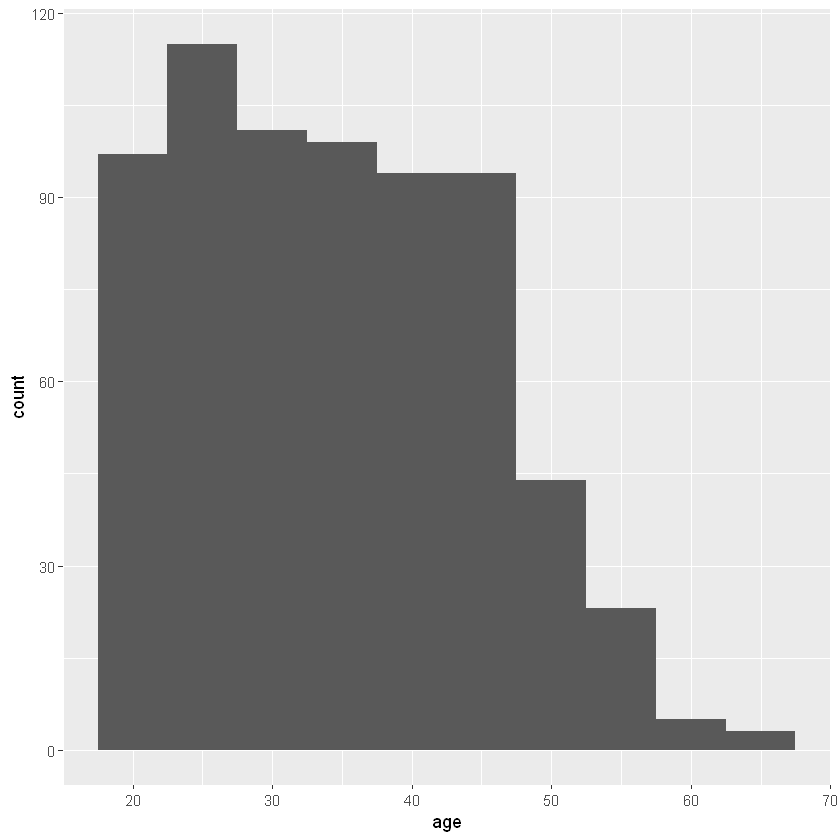

In [6]:
ggplot(data=parole, aes(x=age)) + geom_histogram(binwidth = 5)

**What is the age bracket with the most parolees?**

Answer: 25 years.

### Problem 2.2 - Creating a Basic Histogram
Redo the histogram, adding the following argument to the geom_histogram function: color="blue". What does this do?

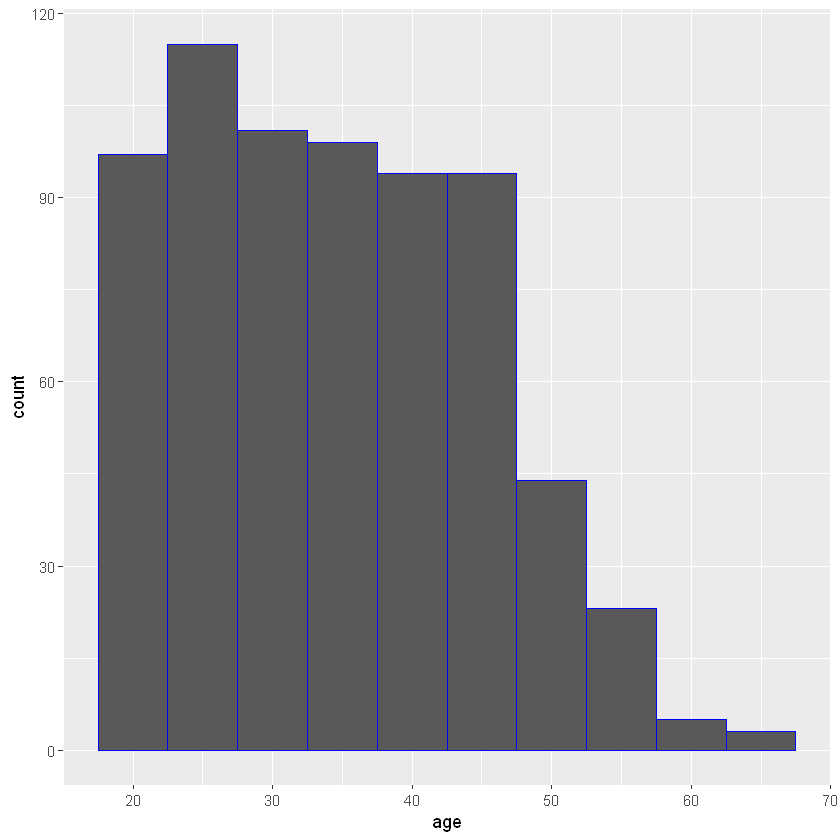

In [7]:
ggplot(data=parole, aes(x=age)) + geom_histogram(binwidth = 5, color='blue')

### Problem 3.1 - Adding Another Dimension
Now suppose we are interested in seeing how the age distribution of male parolees compares to the age distribution of female parolees.

One option would be to create a heatmap with age on one axis and male (a binary variable in our data set) on the other axis. Another option would be to stick with histograms, but to create a separate histogram for each gender. ggplot has the ability to do this automatically using the facet_grid command.

To create separate histograms for male and female, type the following command into your R console:

    ggplot(data = parole, aes(x = age)) + geom_histogram(binwidth = 5) + facet_grid(male ~ .)

The histogram for female parolees is shown at the top, and the histogram for male parolees is shown at the bottom.

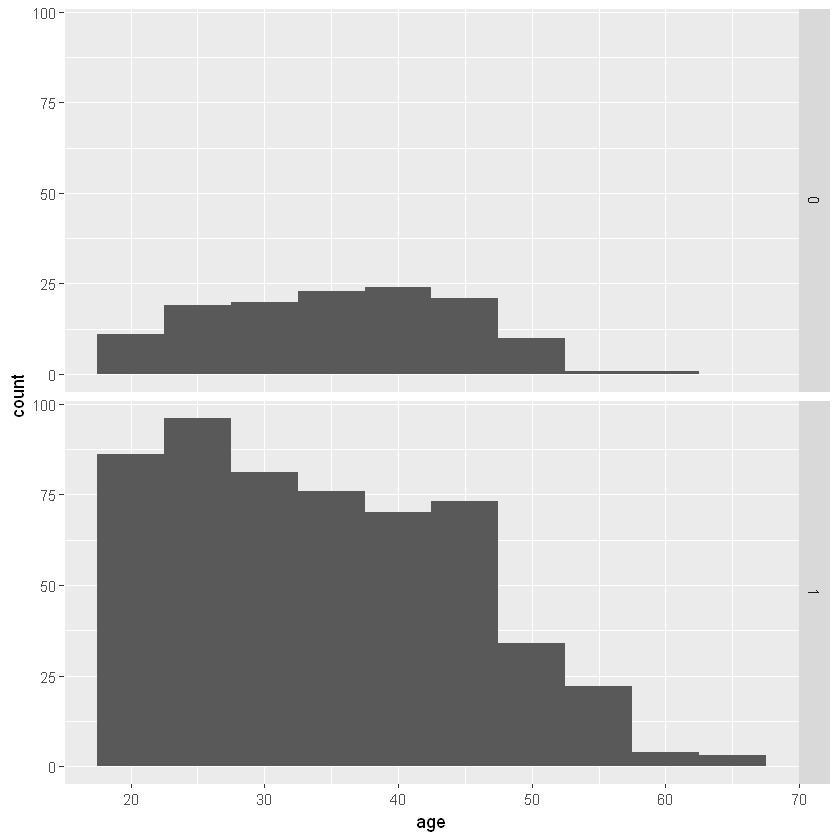

In [8]:
ggplot(data = parole, aes(x = age)) + geom_histogram(binwidth = 5) + facet_grid(male ~ .)

**What is the age bracket with the most female parolees?**

Answer: 40 years.

### Problem 3.2 - Adding Another Dimension
Now change the facet_grid argument to be *.~\\male* instead of *male~.*. What does this do?

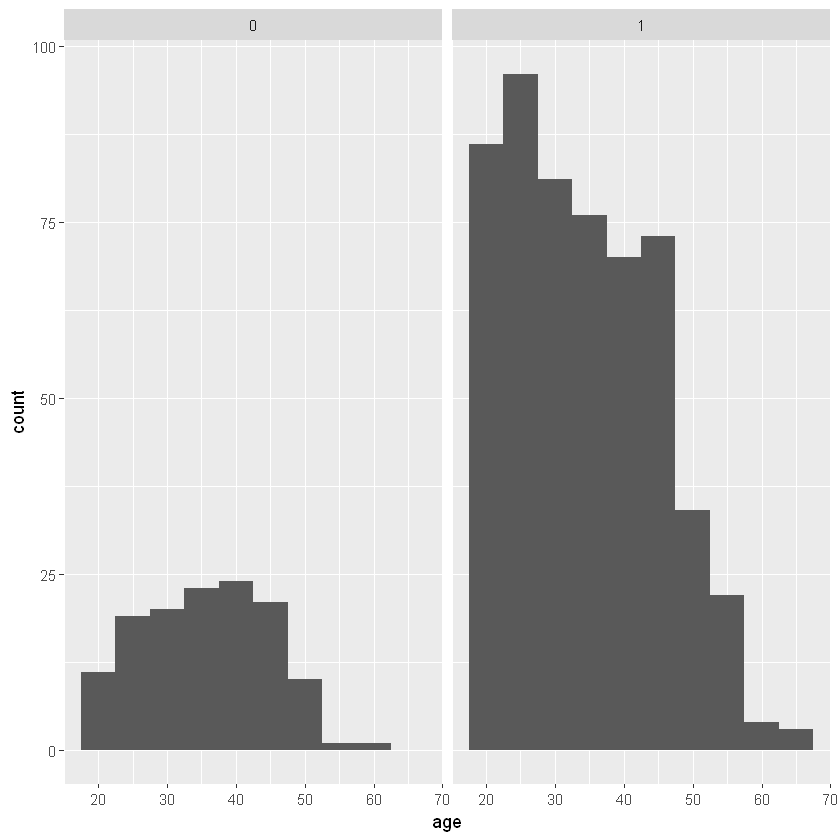

In [9]:
ggplot(data=parole, aes(x=age)) + geom_histogram(binwidth = 5) + facet_grid(. ~ male)

### Problem 3.3 - Adding Another DImension
An alternative to faceting is to simply color the different groups differently. To color the data points by group, we need to tell ggplot that a property of the data (male or not male) should be translated to an aesthetic property of the histogram. We can do this by setting the fill parameter within the aesthetic to male.

Run the following command in your R console to produce a histogram where data points are colored by group:

    ggplot(data = parole, aes(x = age, fill = male)) + geom_histogram(binwidth = 5)

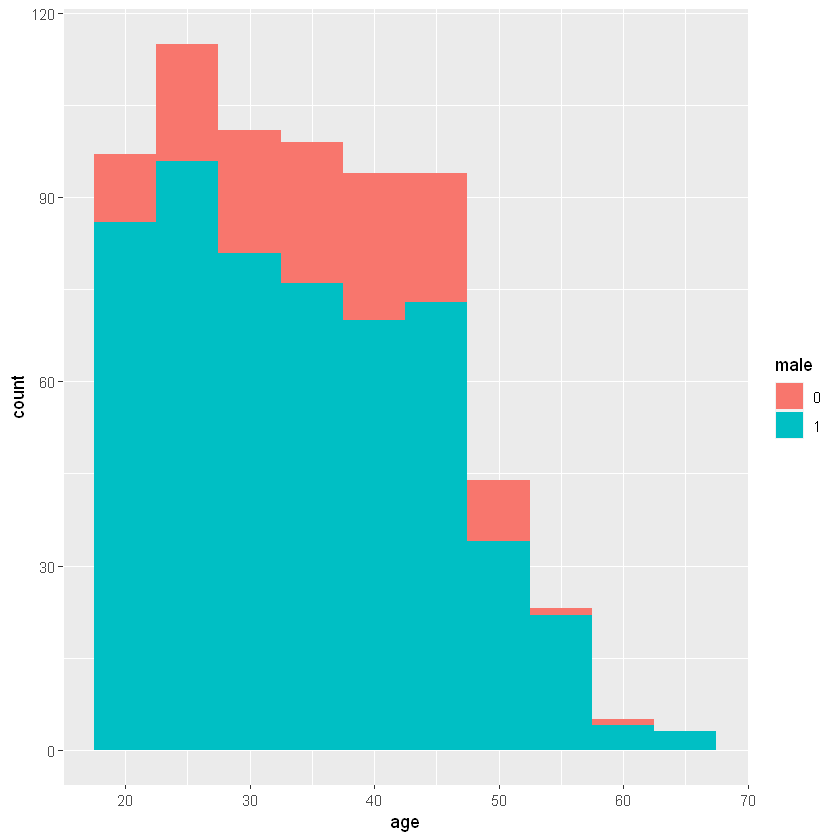

In [10]:
ggplot(data = parole, aes(x = age, fill = male)) + geom_histogram(binwidth = 5)

Since we didn't specify colors to use, ggplot will use its default color selection. Let's change this by defining our own color palette. First, type in your R console:

    colorPalette = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

This is actually a colorblind-friendly palette, desribed on this Cookbook for R page. Now, generate your histogram again, using colorPalette, with the following command:

    ggplot(data = parole, aes(x = age, fill = male)) + geom_histogram(binwidth = 5) + scale_fill_manual(values=colorPalette)

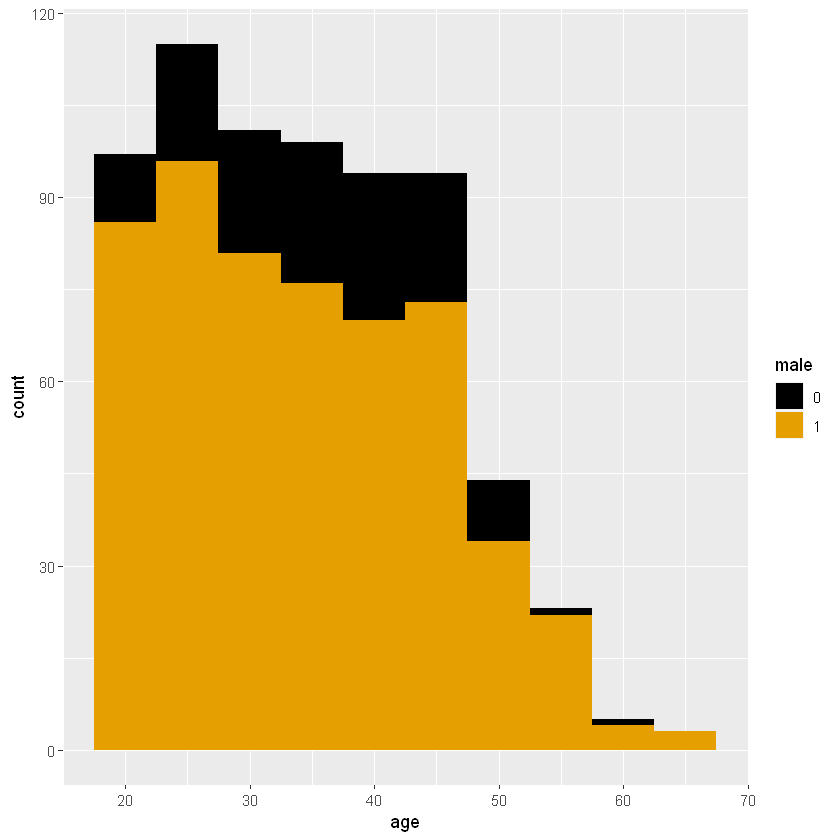

In [11]:
colorPalette = c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

ggplot(data=parole, aes(x=age, fill=male)) + geom_histogram(binwidth = 5) + scale_fill_manual(values=colorPalette)

**What color is the histogram for the female parolees?**

Answer: Black.

### Problem 3.4 - Adding Another Dimension
Coloring the groups differently is a good way to see the breakdown of age by sex within the single, aggregated histogram. However, the bars here are stacked, meaning that the height of the orange bars in each age bin represents the total number of parolees in that age bin, not just the number of parolees in that group.

An alternative to a single, stacked histogram is to create two histograms and overlay them on top of each other. This is a simple adjustment to our previous command.

We just need to:

1) Tell ggplot not to stack the histograms by adding the argument *position="identity"* to the geom_histogram function.

2) Make the bars semi-transparent so we can see both colors by adding the argument *alpha=0.5* to the geom_histogram function.

Redo the plot, making both of these changes.

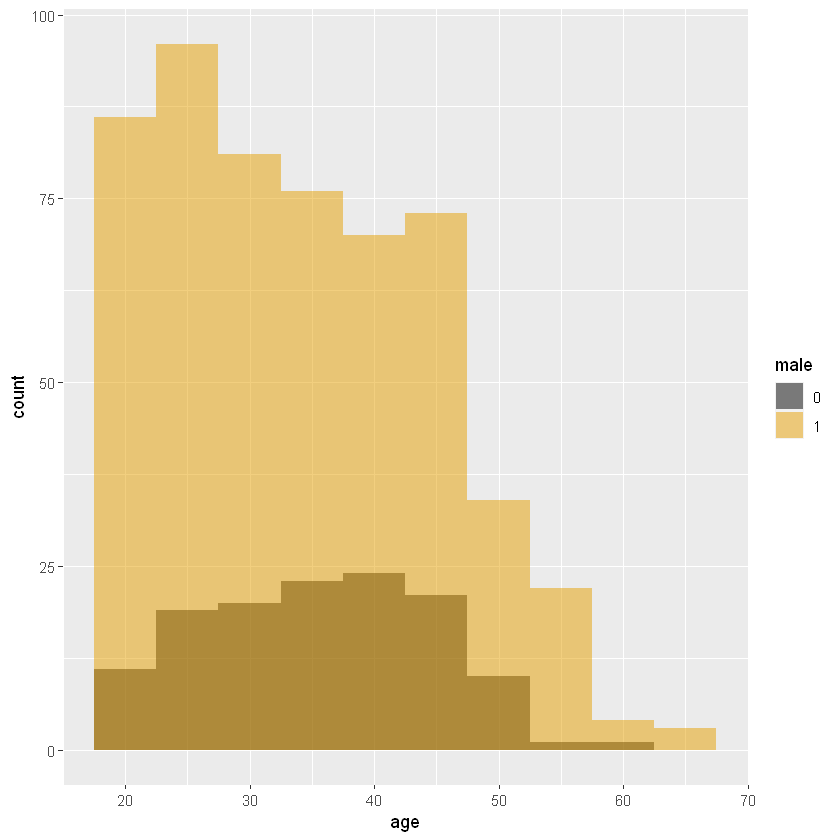

In [12]:
ggplot(data=parole, aes(x=age, fill=male)) + geom_histogram(binwidth = 5, position='identity', alpha=0.5) + 
                                             scale_fill_manual(values=colorPalette)

**Which of the following buckets contain no female paroles?**

Answer: The Brown.

### Problem 4.1 - Time Served
Now let's explore another aspect of the data: the amount of time served by parolees. Create a basic histogram like the one we created in Problem 2, but this time with time.served on the x-axis. Set the bin width to one month.

**What is the most common length of time served, according to this histogram?**

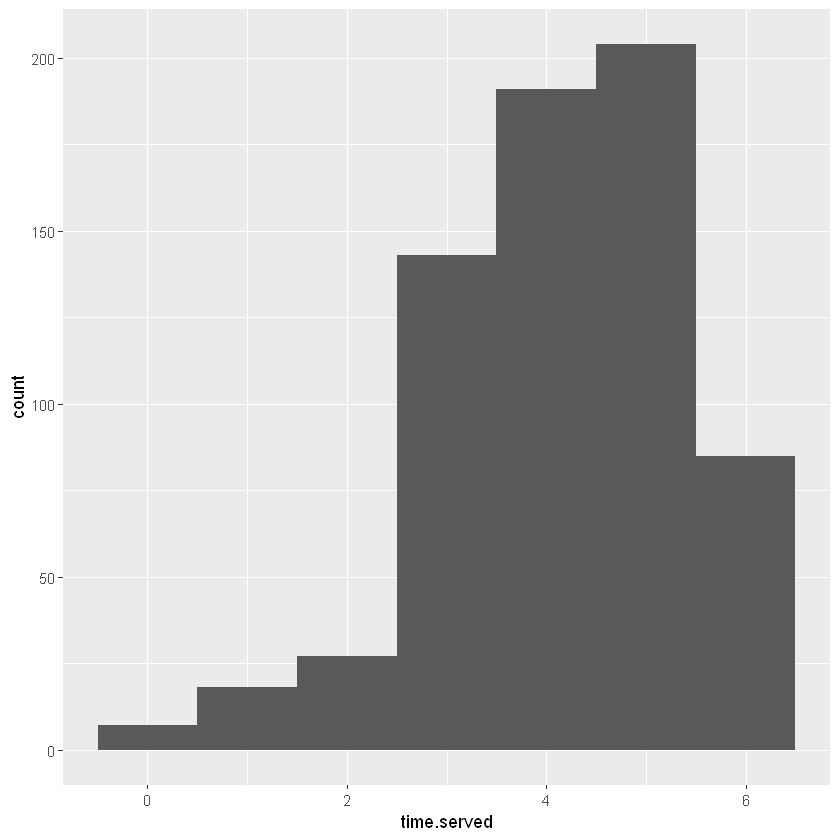

In [13]:
ggplot(data=parole, aes(x=time.served)) + geom_histogram(binwidth=1)

Answer: 5 months.

### Problem 4.2 - Time Served
**Change the binwidth to 0.1 months. Now what is the most common length of time served, according to the histogram?**

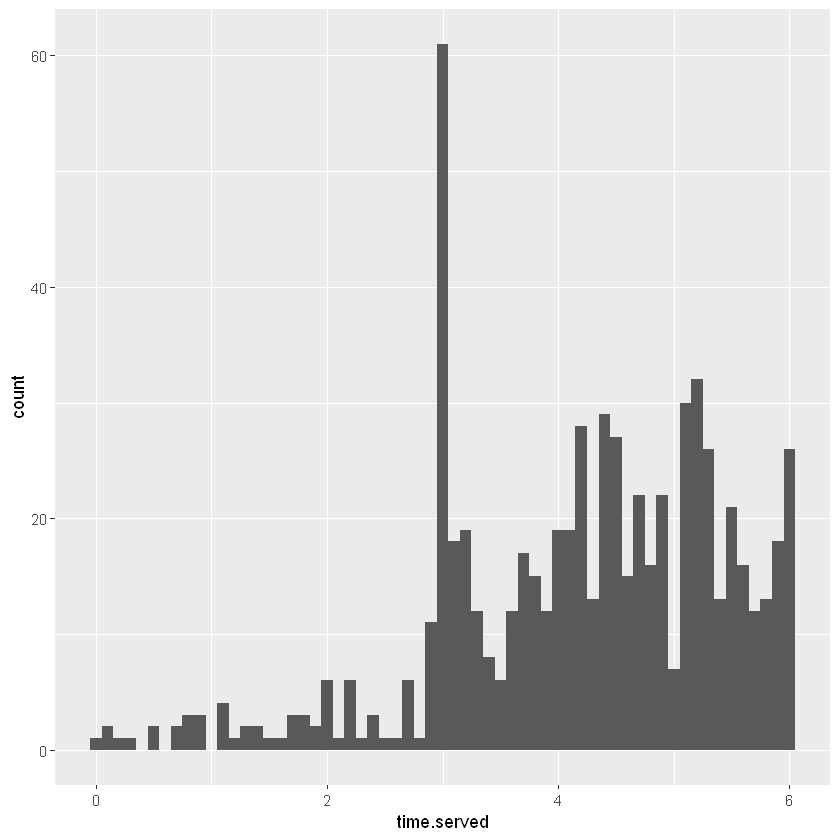

In [14]:
ggplot(data=parole, aes(x=time.served)) + geom_histogram(binwidth=0.1)

Answer: 3 months.

Be careful when choosing the binwidth - it can significantly affect the interpretation of a histogram! When visualizing histograms, it is always a good idea to vary the bin size in order to understand the data at various granularities.

### Problem 4.3 - Time Served
Now, suppose we suspect that it is unlikely that each type of crime has the same distribution of time served. To visualize this, change the binwidth back to 1 month, and use facet_grid to create a separate histogram of time.served for each value of the variable crime.

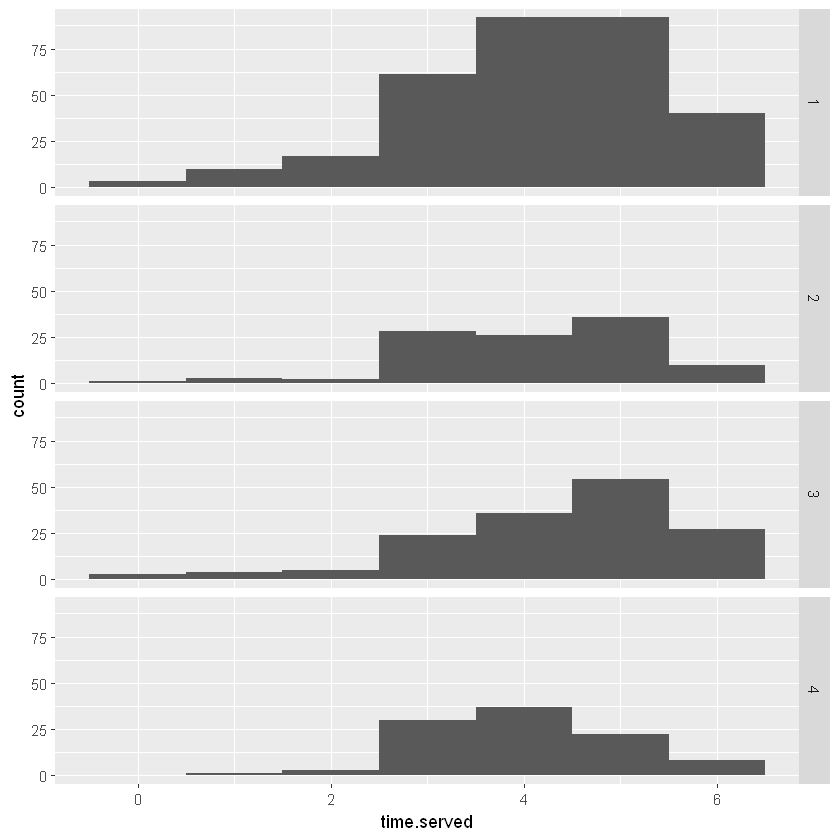

In [15]:
ggplot(data=parole, aes(x=time.served)) + geom_histogram(binwidth=1) + facet_grid(crime ~ .)

**Which crime type has no observations where time served is less than one month?** Recall that crime type #2 is larceny, #3 is drug-related crime, #4 is driving-related crime, and #1 is any other crime.

Answer: (4) Driving-related crime.

**For which crime does the frequency of 5-6 month prison terms exceed the frequencies of each other term length?**

Answer: (3) Drug-related crime.

### Problem 4.4 - Time Served
Now, instead of faceting the histograms, overlay them. Remember to set the position and alpha parameters so that the histograms are not stacked. Also, make sure to indicate that the fill aesthetic should be "crime".

**In this case, faceting seems like a better alternative. Why?**

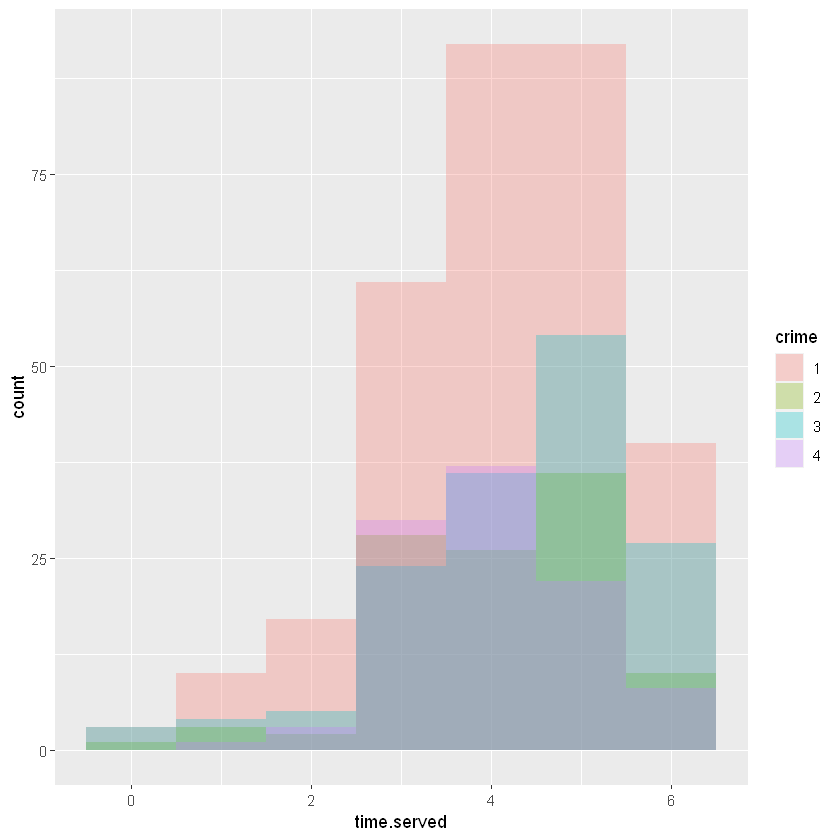

In [16]:
ggplot(data=parole, aes(x=time.served, fill=crime)) + geom_histogram(binwidth=1, position='identity', alpha=0.3)

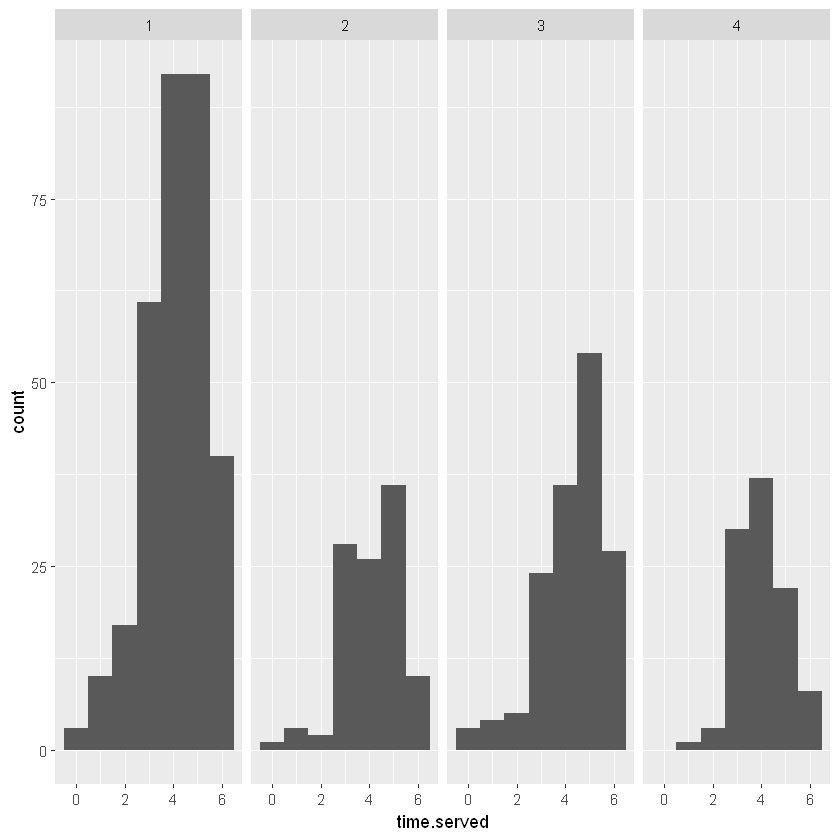

In [17]:
ggplot(data=parole, aes(x=time.served)) + geom_histogram(binwidth=1) + facet_grid(. ~ crime)

Answer: As a comparison between the volume of crimes, the first option is more appropriate. To analyze crimes with fewer occurrences, the color overlay of the first graph makes reading confusing, making the second graph option the most interesting.